<a href="https://colab.research.google.com/github/EwemadeAugustine/MyFirstRepo/blob/main/NN%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files

uploaded = files.upload()



Saving train.csv (1).zip to train.csv (1).zip


In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.express as px
import os

df = pd.read_csv("train.csv (1).zip")
print(df.info())


# Convert dates and clean data
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df.sort_values(by=['Order Date'], ascending=True, inplace=True)
df.set_index('Order Date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


245/245 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 5.0995e-04 - val_loss: 0.0013
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1632e-04 - val_loss: 0.0013
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8015e-04 - val_loss: 0.0013
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.4158e-04 - val_loss: 0.0012
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.7068e-04 - val_loss: 0.0013
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.5816e-04 - val_loss: 0.0013
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.6682e-04 - val_loss: 0.0013
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.5915e-04 - val_loss: 0.0013
Epoch 9/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.7665e-04 - val_loss: 0.0013
Epoch 10/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.7058e-04 - val_loss: 0.0013
Epoch 11/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.9459e-04 - val_loss: 0.0013
Epoch 12/20
245/245

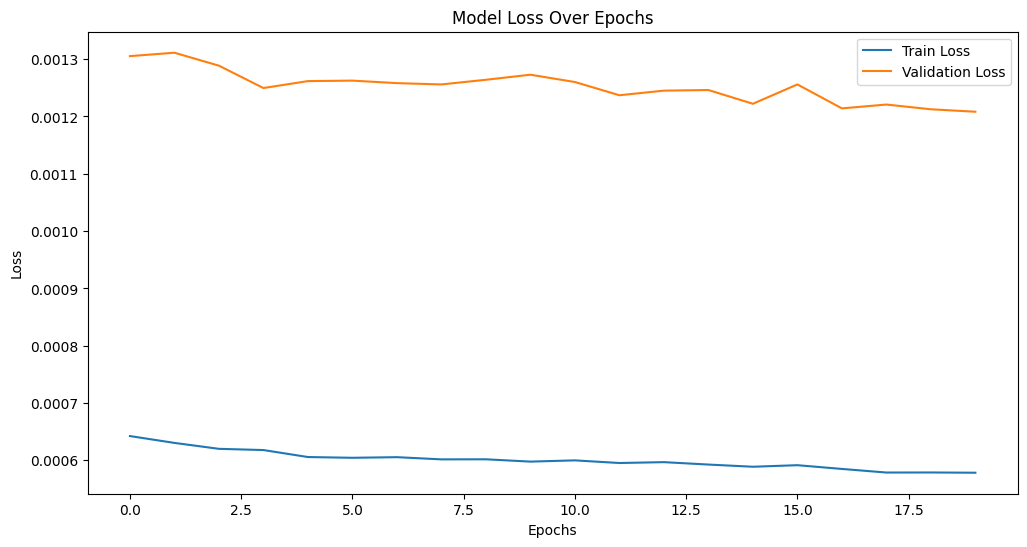

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime

# Load dataset
df = pd.read_csv("train.csv (1).zip")  # Replace with actual filename

# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')  # Specify the correct format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   # Specify the correct format

# Extract relevant time features
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day
df['Ship_Day_Diff'] = (df['Ship Date'] - df['Order Date']).dt.days

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target
features = ['Order_Year', 'Order_Month', 'Order_Day', 'Ship_Day_Diff', 'Ship Mode', 'Segment', 'Country', 'City',
            'State', 'Region', 'Category', 'Sub-Category']
target = ['Sales']

# Scale features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

df[target] = scaler.fit_transform(df[target])

# Prepare data for LSTM
X = df[features].values.reshape(df.shape[0], 1, len(features))
y = df[target].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test Loss: {loss}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

# Save the model
model.save("sales_prediction_lstm.h5")



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 5.0537e-04 - val_loss: 0.0013
Epoch 2/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.1227e-04 - val_loss: 0.0013
Epoch 3/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.7907e-04 - val_loss: 0.0013
Epoch 4/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.2706e-04 - val_loss: 0.0013
Epoch 5/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.1440e-04 - val_loss: 0.0013
Epoch 6/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.2999e-04 - val_loss: 0.0013
Epoch 7/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.3757e-04 - val_loss: 0.0013
Epoch 8/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.4066e-04 - val_loss: 0.0013
Epoch 9/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.3343e-04 - val_loss: 0.0013
Epoch 10/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.6142e-04 - val_loss: 0.0013
Epoch 11/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0909e-04 - val_loss: 0.0013
Epoch 12/30
123/123

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


33/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Test Loss: 0.0012615009909495711
RMSE: 785.758459707112
MAE: 256.5894172979611
R2 Score: 0.03277201692462672


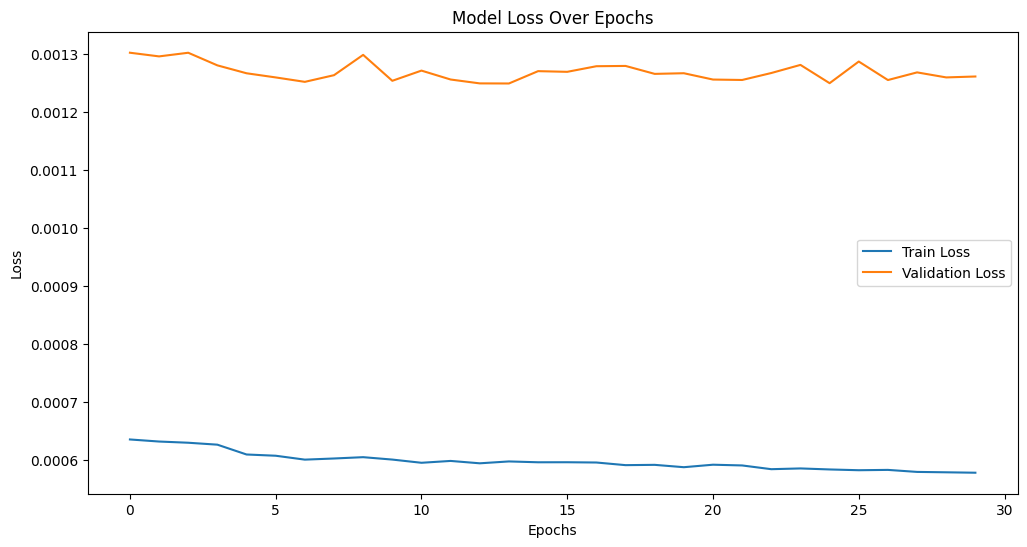

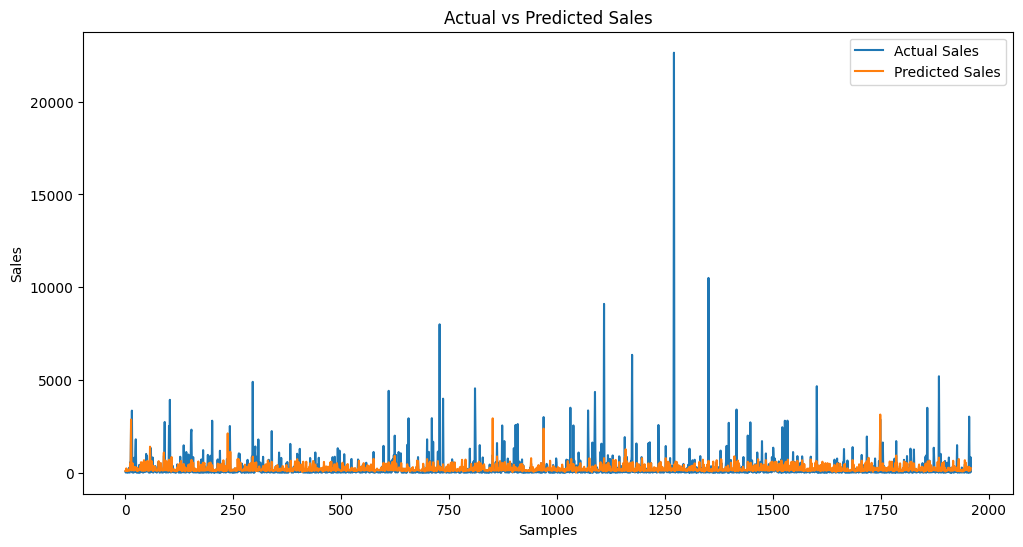

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Attention, Multiply
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime

# Load dataset
df = pd.read_csv("train.csv (1).zip")  # Replace with actual filename

# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')  # Specify the correct format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   # Specify the correct format

# Extract relevant time features
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day
df['Ship_Day_Diff'] = (df['Ship Date'] - df['Order Date']).dt.days

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target
features = ['Order_Year', 'Order_Month', 'Order_Day', 'Ship_Day_Diff', 'Ship Mode', 'Segment', 'Country', 'City',
            'State', 'Region', 'Category', 'Sub-Category']
target = ['Sales']

# Scale features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df[target] = scaler.fit_transform(df[target])

# Prepare data for LSTM
X = df[features].values.reshape(df.shape[0], 1, len(features))
y = df[target].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model with Attention Layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm_out = LSTM(64, return_sequences=True)(input_layer)
attention = Attention()([lstm_out, lstm_out])
context = Multiply()([lstm_out, attention])
lstm_out2 = LSTM(64, return_sequences=False)(context)

x = Dropout(0.3)(lstm_out2)
x = Dense(50, activation='relu')(x)
x = Dense(1)(x)

model = Model(inputs=input_layer, outputs=x)

# Compile model with optimized hyperparameters
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# Inverse transform predictions and actual values
y_test_real = scaler.inverse_transform(y_test)
y_pred_real = scaler.inverse_transform(y_pred)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test, y_pred)

print(f'Test Loss: {loss}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(y_test_real, label='Actual Sales')
plt.plot(y_pred_real, label='Predicted Sales')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()

# Save the model
model.save("sales_prediction_lstm_attention.h5")
